In [1]:
import pandas as pd


In [3]:
data = pd.read_csv('Salary_Data.csv');
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
data[data.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [8]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [15]:
x = data[['Age','Years of Experience']]
y = data.Salary

In [16]:
x

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0
...,...,...
6699,49.0,20.0
6700,32.0,3.0
6701,30.0,4.0
6702,46.0,14.0


In [17]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=12)

In [35]:
xtrain

,Age,Years of Experience
1565,24.0,1.0
2900,36.0,12.0
2602,28.0,4.0
1807,33.0,6.0
3578,43.0,15.0
...,...,...
3718,26.0,3.0
3329,30.0,5.0
1416,57.0,18.0
5792,37.0,14.0


In [1]:
xtest

NameError: name 'xtest' is not defined

In [22]:
xtrain.shape

(5358, 2)

In [23]:
ytrain.shape

(5358,)

In [26]:
ytrain

6655    190000.0
6410     80000.0
5321     65000.0
2257     60000.0
5601     80000.0
          ...   
4027    220000.0
300     180000.0
6685    200000.0
3466    135000.0
2886    167015.0
Name: Salary, Length: 5358, dtype: float64

In [38]:
linmodel = LinearRegression()
linmodel.fit(xtrain,ytrain)

LinearRegression()

In [40]:
linmodel.predict([[40,5]])

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76947.70470176])

##Evaluation of model


In [41]:
ytest

5596    200000.0
6579     35000.0
3666     65000.0
2271    140000.0
4637     70000.0
          ...   
1187    130000.0
5523    120000.0
5541     50000.0
5047    120000.0
2482    139398.0
Name: Salary, Length: 1340, dtype: float64

In [42]:
ypred = linmodel.predict(xtest)

In [43]:
ytest #Actual value

5596    200000.0
6579     35000.0
3666     65000.0
2271    140000.0
4637     70000.0
          ...   
1187    130000.0
5523    120000.0
5541     50000.0
5047    120000.0
2482    139398.0
Name: Salary, Length: 1340, dtype: float64

In [47]:
ypred #Predictive value

array([177905.94614816,  66171.8376962 ,  83116.55896104, ...,
        73508.2345008 , 111878.37490678, 202187.0642176 ], shape=(1340,))

##MSE 

In [49]:
import numpy as np

In [55]:
mse=np.mean((ytest-ypred)**2)
mse

np.float64(843634852.8432493)

In [57]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,mean_absolute_percentage_error

In [58]:
mse2=mean_squared_error(ytest,ypred)
mse2


843634852.8432493

In [59]:
rmse =np.sqrt(mse)
print(rmse)

29045.3929710591


In [62]:
mape = mean_absolute_percentage_error(ytest,ypred) * 100
mape

40.10562722181582

Assumptions 
1. There should be linear relationship between dependent and independent variables
 (scatterplot,correlation)
2.No multicollinearity

In [63]:
import matplotlib.pyplot as plt


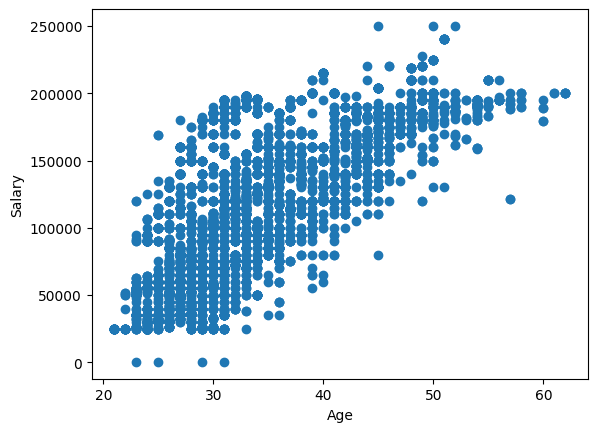

In [67]:
plt.scatter(data.Age,data.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

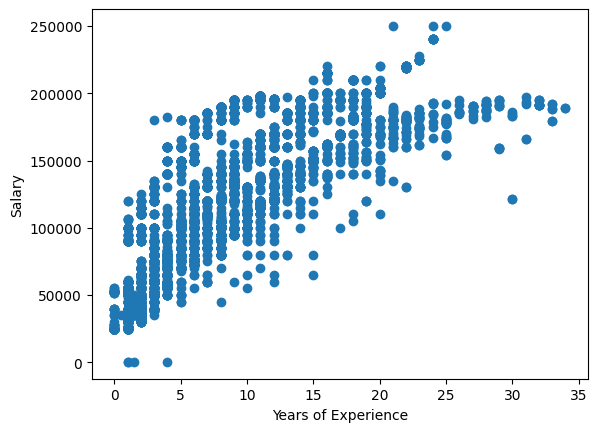

In [69]:
plt.scatter(data['Years of Experience'],data.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()